In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn import preprocessing
import keras
import joblib
import tensorflow as tf
import numpy as np
import cv2
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model

from sklearn.manifold import TSNE
from datetime import datetime
from matplotlib import pyplot as plt
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Conv2D, Dropout, Activation, Flatten, MaxPooling2D

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam, RMSprop
import numpy as np


Using TensorFlow backend.


In [ ]:
assets = pd.read_excel("baksa_assents.xlsx")
census = pd.read_excel("baksa_census.xlsx")

In [ ]:
assets = assets.fillna(0)
census = census.fillna(0)

In [ ]:
assets.head(1)

In [ ]:
assets = assets[assets[10]=="Rural"].drop_duplicates(subset=9, keep="last")

In [ ]:
assets_X = assets.loc[:, 9:].drop(columns={10, 85, 86})

In [ ]:
assets_X.rename(columns={9:'Name'}, inplace=True)

In [ ]:
electricity = assets.loc[:, 85:86].values

In [ ]:
census.head(1)

In [ ]:
census = census[census['TRU']=="Rural"].drop_duplicates(subset='Name', keep="last")

In [ ]:
census_X = census.loc[:, 'Name':].drop(columns={'TRU'})

In [ ]:
combined_names = pd.merge(assets_X, census_X, on=['Name'])['Name'].tolist()

In [ ]:
images_X = []
for i in range(0, 652):
    n = cv2.resize(cv2.imread('data_assam/image_'+str(i)+".jpg"), (100, 100))
    images_X.append(n)
images_X = np.array(images_X) #.reshape(len(images), -1)

In [ ]:
X_a = []
X_b = []
X_image = []
y = []

for idx, i in enumerate(combined_names):
    X_a.append(census_X[census_X['Name']==i].values[0][1:].tolist())
    X_b.append(assets_X[assets_X['Name']==i].values[0][1:].tolist())
    X_image.append(images_X[idx])
    y.append(electricity[idx])

X_a = preprocessing.scale(np.array(X_a))
X_b = preprocessing.scale(np.array(X_b))
X_image = np.array(X_image)/255
y = np.array(y)
y = np.argmax(preprocessing.scale(y), axis=1)
y = to_categorical(y)

In [ ]:
X_a.shape, X_b.shape, X_image.shape, y.shape

In [ ]:
X_a_train, X_a_test, X_b_train, X_b_test, X_image_train, X_image_test, y_train, y_test = train_test_split(X_a, 
                                                                                         X_b, X_image, y, test_size=0.2)

In [ ]:
X_a_train.shape, X_a_test.shape

In [22]:
image_input = Input(shape=(600, 600, 3), name='image_input')

shared = Conv2D(512, (3, 3), padding='same', activation='relu')(image_input)
shared = Conv2D(8, (3, 3), padding='same', activation='relu')(shared)
shared = Flatten()(shared)

inputA_ = Input(shape=(10,))
inputA = Dense(4096, activation="relu")(inputA_)
inputA = Dense(2048, activation="relu")(inputA)
inputA = Dense(1024, activation="relu")(inputA)

ii_ = Input(shape=(10,))
ii = Dense(4096, activation="relu")(ii_)
ii = Dense(2048, activation="relu")(ii)
ii = Dense(1024, activation="relu")(ii)

combined = Concatenate()([inputA, shared, ii])

combined = Dense(10, activation="relu")(combined)
combined = Dense(10, activation="relu")(combined)
combined = Dense(10, activation="relu")(combined)
combined = Dense(10, activation="softmax")(combined)

 
model = Model(inputs=[inputA_, ii_, image_input], outputs=[combined])

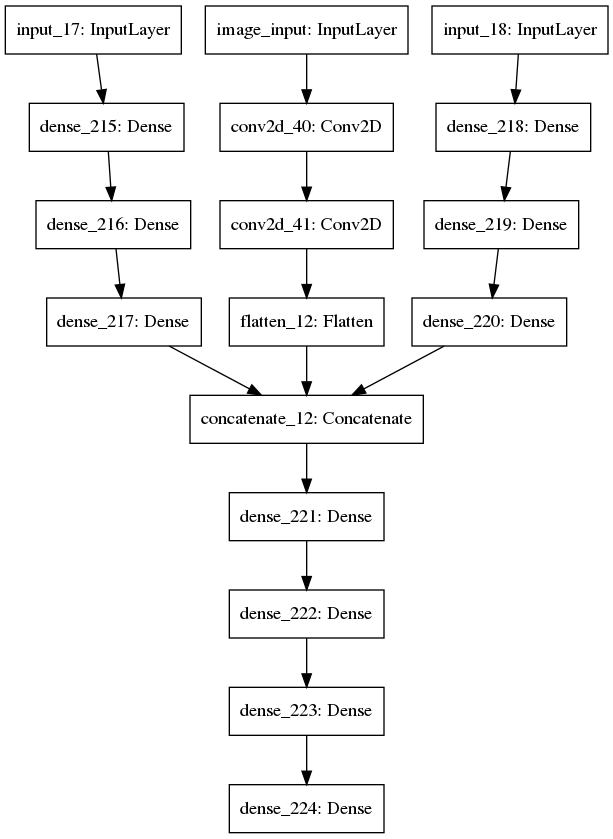

In [23]:
plot_model(model, to_file='1.png')

## Appendix

In [ ]:
# assets.loc[:, :9].drop(columns={1,3,5,7,8}).to_pickle("images")